In [102]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
import investpy

In [103]:
df=investpy.indices.get_index_historical_data('VIX' , 'united states',  from_date='03/01/2007' , to_date='29/01/2022') 
##자산 클래스 입맞에 맞게 설정
print(df.info())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3714 entries, 2007-01-04 to 2022-01-28
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Open      3714 non-null   float64
 1   High      3714 non-null   float64
 2   Low       3714 non-null   float64
 3   Close     3714 non-null   float64
 4   Volume    3714 non-null   int64  
 5   Currency  3714 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 203.1+ KB
None


In [104]:
df.isnull().sum() ### 데이터프레임 전체 결측값 합계

Open        0
High        0
Low         0
Close       0
Volume      0
Currency    0
dtype: int64

In [105]:
df.dropna(inplace=True)
# df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3714 entries, 2007-01-04 to 2022-01-28
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Open      3714 non-null   float64
 1   High      3714 non-null   float64
 2   Low       3714 non-null   float64
 3   Close     3714 non-null   float64
 4   Volume    3714 non-null   int64  
 5   Currency  3714 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 203.1+ KB


In [106]:
df=df.drop(['Volume','Currency'], axis=1)


In [107]:
df['Change'] = df['Close'].pct_change()
df['Change'] = df['Change'].fillna(0)

In [108]:
df.tail(15)

,Open,High,Low,Close,Change
Date,,,,,
2022-01-07,28711.53,28813.09,28293.70,28478.56,-0.000327
2022-01-11,28380.90,28473.47,28089.49,28222.48,-0.008992
2022-01-12,28449.53,28814.31,28427.60,28765.66,0.019246
2022-01-13,28658.22,28660.45,28444.96,28489.13,-0.009613
2022-01-14,28246.99,28252.96,27889.21,28124.28,-0.012807
2022-01-17,28332.72,28449.99,28274.18,28333.52,0.007440
2022-01-18,28451.34,28690.34,28129.66,28257.25,-0.002692
2022-01-19,27928.89,27958.17,27314.41,27467.23,-0.027958
2022-01-20,27401.43,27882.53,27217.59,27772.93,0.011130


In [109]:
minmaxscaler=MinMaxScaler()
scaled_data=minmaxscaler.fit_transform(df)
print(scaled_data[:4])
print(scaled_data.shape)

[[0.43585171 0.43379133 0.4390004  0.43610577 0.44631674]
 [0.43555612 0.43158285 0.42604161 0.42500779 0.38722345]
 [0.42295758 0.42879324 0.42488763 0.43119789 0.47978253]
 [0.43032729 0.42619311 0.41908582 0.41869023 0.3792695 ]]
(3714, 5)


In [110]:
sequence_X=[]
sequence_Y=[]
for i in range(len(scaled_data)-30):
    x=scaled_data[i:i+30] #0~29
    y=scaled_data[i+30][4] # [4]은 Change(등락률)만 찝는다. 이곳이 일변량과 다변량의 차이
    sequence_X.append(x) 
    sequence_Y.append(y)

    if i is 0:
        print(x, '->',y)
        print(len(x))

[[0.43585171 0.43379133 0.4390004  0.43610577 0.44631674]
 [0.43555612 0.43158285 0.42604161 0.42500779 0.38722345]
 [0.42295758 0.42879324 0.42488763 0.43119789 0.47978253]
 [0.43032729 0.42619311 0.41908582 0.41869023 0.3792695 ]
 [0.42039583 0.42020155 0.41529551 0.41427653 0.42224467]
 [0.42129448 0.42456196 0.42307648 0.42354348 0.49717101]
 [0.42896105 0.42932288 0.43171326 0.43001856 0.48139424]
 [0.43026274 0.42992976 0.4330493  0.42970267 0.44462063]
 [0.42866377 0.43191626 0.42568304 0.43219641 0.45971186]
 [0.43269369 0.43502197 0.43494509 0.43683665 0.47115677]
 [0.43661106 0.43373858 0.43589576 0.43427516 0.43269113]
 [0.44041292 0.43822813 0.44263972 0.43909157 0.47202666]
 [0.43703278 0.43643071 0.43923562 0.43843055 0.44281127]
 [0.44361554 0.44111651 0.44676734 0.44261558 0.46853046]
 [0.44783232 0.44384324 0.443755   0.4405364  0.43534298]
 [0.43778619 0.43558369 0.43836578 0.43899629 0.43816525]
 [0.43885387 0.43843915 0.43915396 0.44105133 0.45721632]
 [0.44381472 0

In [111]:
sequence_X=np.array(sequence_X)
sequence_Y=np.array(sequence_Y)
print(sequence_X[0])
print(sequence_Y[0])
print(sequence_X.shape)
print(sequence_Y.shape)

[[0.43585171 0.43379133 0.4390004  0.43610577 0.44631674]
 [0.43555612 0.43158285 0.42604161 0.42500779 0.38722345]
 [0.42295758 0.42879324 0.42488763 0.43119789 0.47978253]
 [0.43032729 0.42619311 0.41908582 0.41869023 0.3792695 ]
 [0.42039583 0.42020155 0.41529551 0.41427653 0.42224467]
 [0.42129448 0.42456196 0.42307648 0.42354348 0.49717101]
 [0.42896105 0.42932288 0.43171326 0.43001856 0.48139424]
 [0.43026274 0.42992976 0.4330493  0.42970267 0.44462063]
 [0.42866377 0.43191626 0.42568304 0.43219641 0.45971186]
 [0.43269369 0.43502197 0.43494509 0.43683665 0.47115677]
 [0.43661106 0.43373858 0.43589576 0.43427516 0.43269113]
 [0.44041292 0.43822813 0.44263972 0.43909157 0.47202666]
 [0.43703278 0.43643071 0.43923562 0.43843055 0.44281127]
 [0.44361554 0.44111651 0.44676734 0.44261558 0.46853046]
 [0.44783232 0.44384324 0.443755   0.4405364  0.43534298]
 [0.43778619 0.43558369 0.43836578 0.43899629 0.43816525]
 [0.43885387 0.43843915 0.43915396 0.44105133 0.45721632]
 [0.44381472 0

In [112]:
last_test_data_X=sequence_X[-60:] #최근 30일간의 데이터를 학습시키기 위해 2배인 60개를 슬라이싱
last_test_data_Y=sequence_Y[-60:]

In [113]:
X_train, X_test, Y_train, Y_test=train_test_split(
sequence_X[:-30], sequence_Y[:-30], test_size=0.1)
xy=X_train, X_test, Y_train, Y_test,last_test_data_X,last_test_data_Y
np.save('./VIX_prepro',xy)

C:\Users\Gabriel\Anaconda3\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [114]:
# ##나중에 불러올때 
# xy=np.load('./samsung_prepro.npy',allow_pickle=True)

In [115]:
##MinMaxScaler 현재폴더에 저장 ##pickle은 현재 그 데이터 그 타잎 그대로 저장하는 명령어
import pickle
with open('./VIX_minmaxscaler_Change.pickle','wb') as f:
    pickle.dump(minmaxscaler,f)

In [116]:
# ##나중에 MinMaxScaler 불러올떄
# with open('./samsung_stock_minmaxscaler.pickle','rb') as f:
#     minmaxscaler=pickle.load(f)

In [117]:
model=Sequential()
model.add(LSTM(512,input_shape=(30,5), activation='tanh'))
model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128))
model.add(Dropout(0.2))

model.add(Dense(1))
model.compile(loss='mse', optimizer='adam') ##값을 예측하는 모델에서는 마지막 layer에서 sigmoid activation을 쓰면 안됨
model.summary()

##30*6*50이 FLATTEN된 이후 FULLY CONNECTED 로 들어가짐

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 512)               1060864   
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 1,126,657
Trainable params: 1,126,657
Non-trainable params: 0
_________________________________________________________________


In [118]:
#######에폭 돌리기 전 얼리스타핑을 걸어주면 굳이 100번까지 가지않고 과적합을 방지한다(중요)

early_stopping=EarlyStopping(monitor='val_loss',patience=15)
fit_hist=model.fit(X_train, Y_train, epochs=100,batch_size=50
                  ,callbacks=[early_stopping], verbose=1,shuffle=False, validation_data=(X_test,Y_test)) 
#셔플=False의 의미==한 에폭안에서 섞어넣지 말고 시간순으로 입력
# ####예측값이기 때문에 loss만 본다

Train on 3288 samples, validate on 366 samples
Epoch 1/100
3288/3288 [==============================] - 37s 11ms/step - loss: 0.0129 - val_loss: 0.0053
Epoch 2/100
3288/3288 [==============================] - 35s 11ms/step - loss: 0.0047 - val_loss: 0.0050
Epoch 3/100
3288/3288 [==============================] - 37s 11ms/step - loss: 0.0046 - val_loss: 0.0052
Epoch 4/100
3288/3288 [==============================] - 36s 11ms/step - loss: 0.0044 - val_loss: 0.0050
Epoch 5/100
3288/3288 [==============================] - 37s 11ms/step - loss: 0.0044 - val_loss: 0.0049
Epoch 6/100
3288/3288 [==============================] - 37s 11ms/step - loss: 0.0042 - val_loss: 0.0046
Epoch 7/100
3288/3288 [==============================] - 39s 12ms/step - loss: 0.0042 - val_loss: 0.0047
Epoch 8/100
3288/3288 [==============================] - 39s 12ms/step - loss: 0.0041 - val_loss: 0.0046
Epoch 9/100
3288/3288 [==============================] - 39s 12ms/step - loss: 0.0040 - val_loss: 0.0047
Epoch 10

In [119]:
# model.save('./VIX_20211128_multivariation_Change.h5') ##모델 저장시에는 꼭 h5 쓸것

In [120]:
# model=load_model('C:/Users/Gabriel/PycharmProjects/pythonProject2/Machine Learning/RNN_stock_close_predict_multivariation.h5')

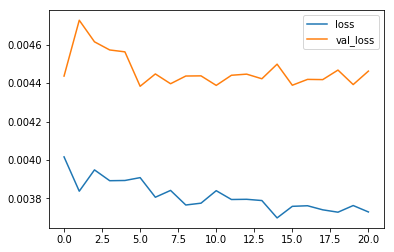

In [121]:
plt.plot(fit_hist.history['loss'][10:],label='loss')
plt.plot(fit_hist.history['val_loss'][10:],label='val_loss')
plt.legend()
plt.show()

In [1]:
score=model.evaluate(X_test,Y_test,verbose=0)
print('LSTM val loss:', score)


NameError: name 'model' is not defined

In [123]:
predict=model.predict(X_test)

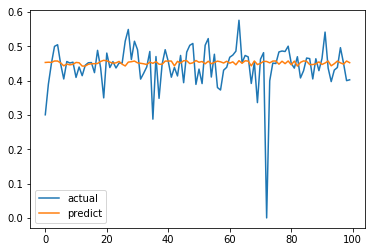

In [124]:
plt.plot(Y_test[-100:], label='actual') ##날짜순이 아닌 랜덤하게 
plt.plot(predict[-100:], label='predict')
plt.legend()
plt.show()
##시계열이 아닌 랜덤 predict와 actual의 차이

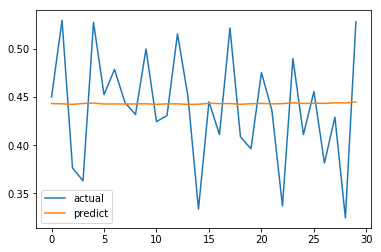

In [125]:
last_predict=model.predict(last_test_data_X)
plt.plot(last_test_data_Y[-30:],label='actual')
plt.plot(last_predict[-30:], label='predict') #마지막 30일치

plt.legend()
plt.show()
##따라가는 추세이기 때문에 시계열분해의 추세를 없애버려야함 --분해시계열

In [126]:
tom_predict=model.predict(last_test_data_X[-1:].reshape(1,30,5))
print(tom_predict)

[[0.4449254]]


In [127]:
minmaxscaler_close=MinMaxScaler()
minmaxscaler_close.fit_transform(df[['Change']])

array([[0.44631674],
       [0.38722345],
       [0.47978253],
       ...,
       [0.42900894],
       [0.32448481],
       [0.52810783]])

In [128]:
tom_predicted_value=minmaxscaler_close.inverse_transform(tom_predict)
tom_predicted_value=tom_predicted_value*100
print('% 2f ' % tom_predicted_value)

-0.035558 
